### Dataset Information

    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    
    Type of glass: 
        1 building_windows_float_processed
        2 building_windows_non_float_processed
        3 vehicle_windows_float_processed
        4 vehicle_windows_non_float_processed (none in this database)
        5 containers
        6 tableware
        7 headlamps

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

### Reading the data

In [3]:
glass = pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Features in data

In [4]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

### Dataset Info

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Statistical Summary

In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Target Countplot

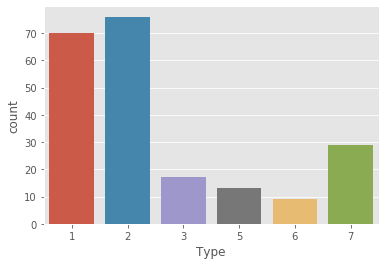

In [7]:
sns.countplot(glass["Type"])
plt.show()

### Checking distribution of the features

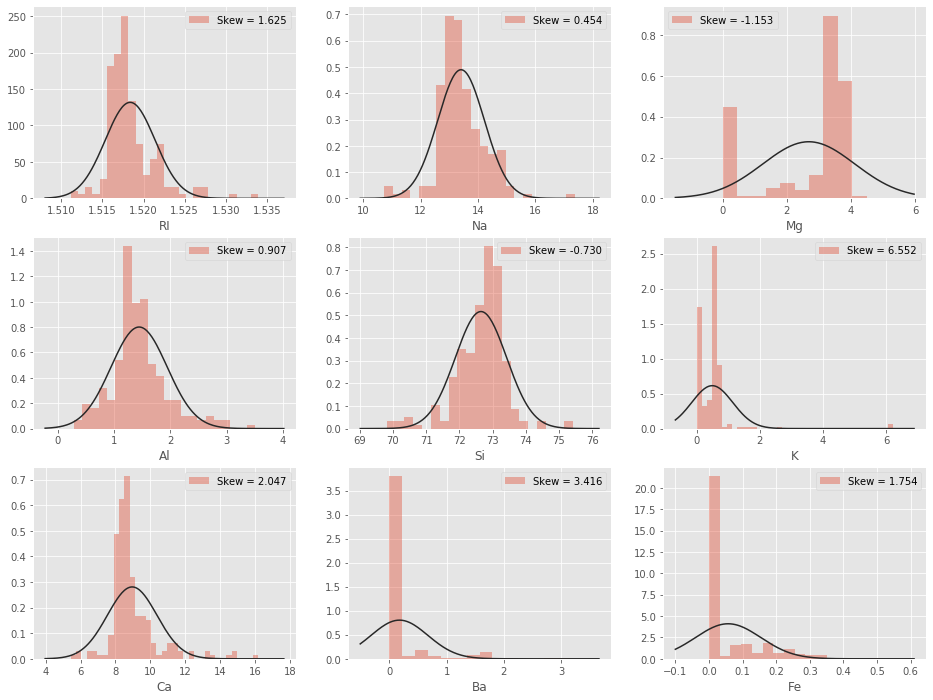

In [8]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = glass[col].skew()
    sns.distplot(glass[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

    None of the features are normally distributed and some have outliers

    Note: Outlier treatment maybe done to check impact on classification

In [9]:
def skew_treatment(data, columns):
    from scipy.special import boxcox1p
    for col in columns:
        data[col+"_bc"] = boxcox1p(data[col], stats.boxcox_normmax(data[col]+1))
    return data

In [10]:
#glass = skew_treatment(glass, ["RI","Mg","K","Ca","Ba","Fe"])

### Univariate Box Plot

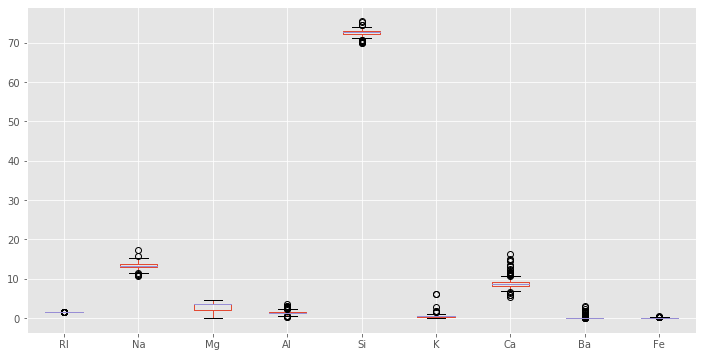

In [11]:
glass.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

### Observations:
    - Silicon is the main component of Glass making more than 70% of composition
    - Combined Silicon, Sodium and Calcium make up around 90%
    - Iron is the least important component

Above box plot confirms the outliers

### Bivariate Box plots

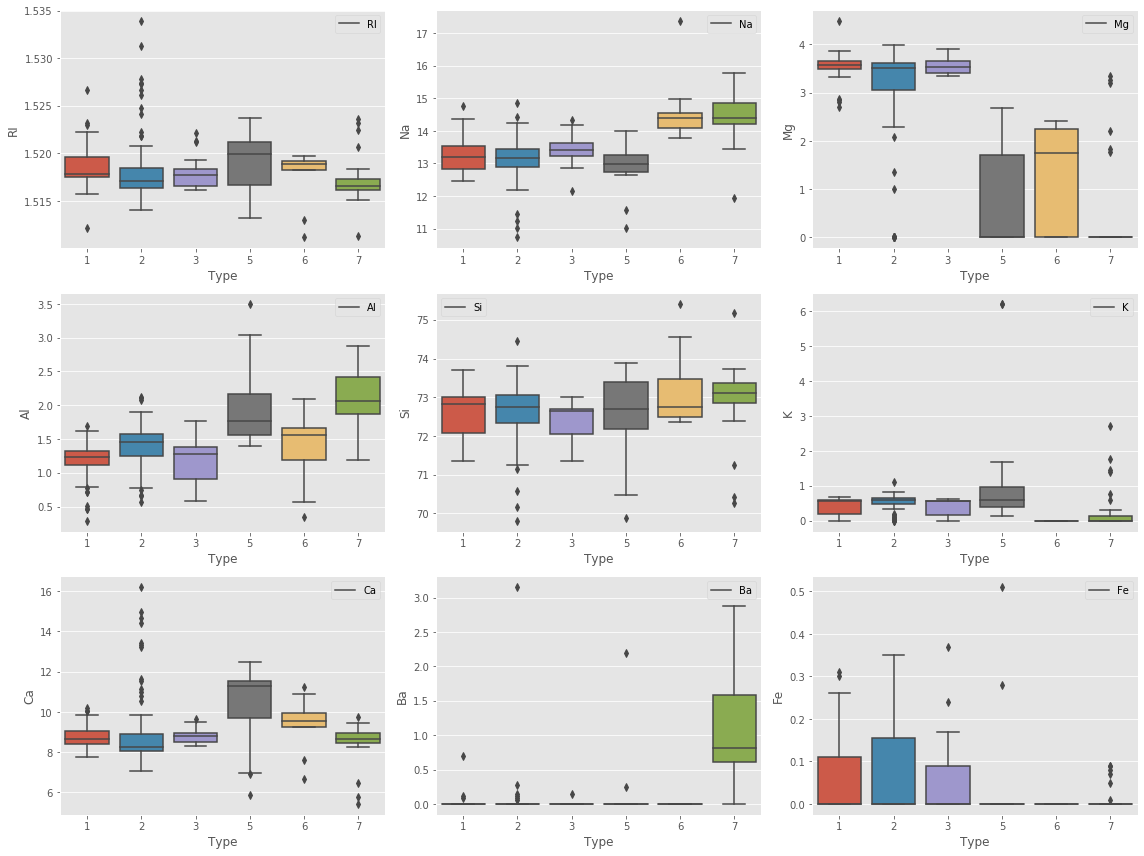

In [12]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("Type", col, ax = ax[i], data=glass)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

### Inferences
    - Refractive index lies between 1.51 and 1.54
    - Type 6 and 7 have higher Na %
    - Type 1,2 and 3 have higher Mg %
    - Type 5 and 7 have higher Al %
    - Si % is similar in all types
    - Type 6 has no K composition
    - Type 5 and 6 have higher Ca composition
    - Ba is mostly used in Type 7
    - Fe is used in Type 1,2 and 3

### Scatter Matrix

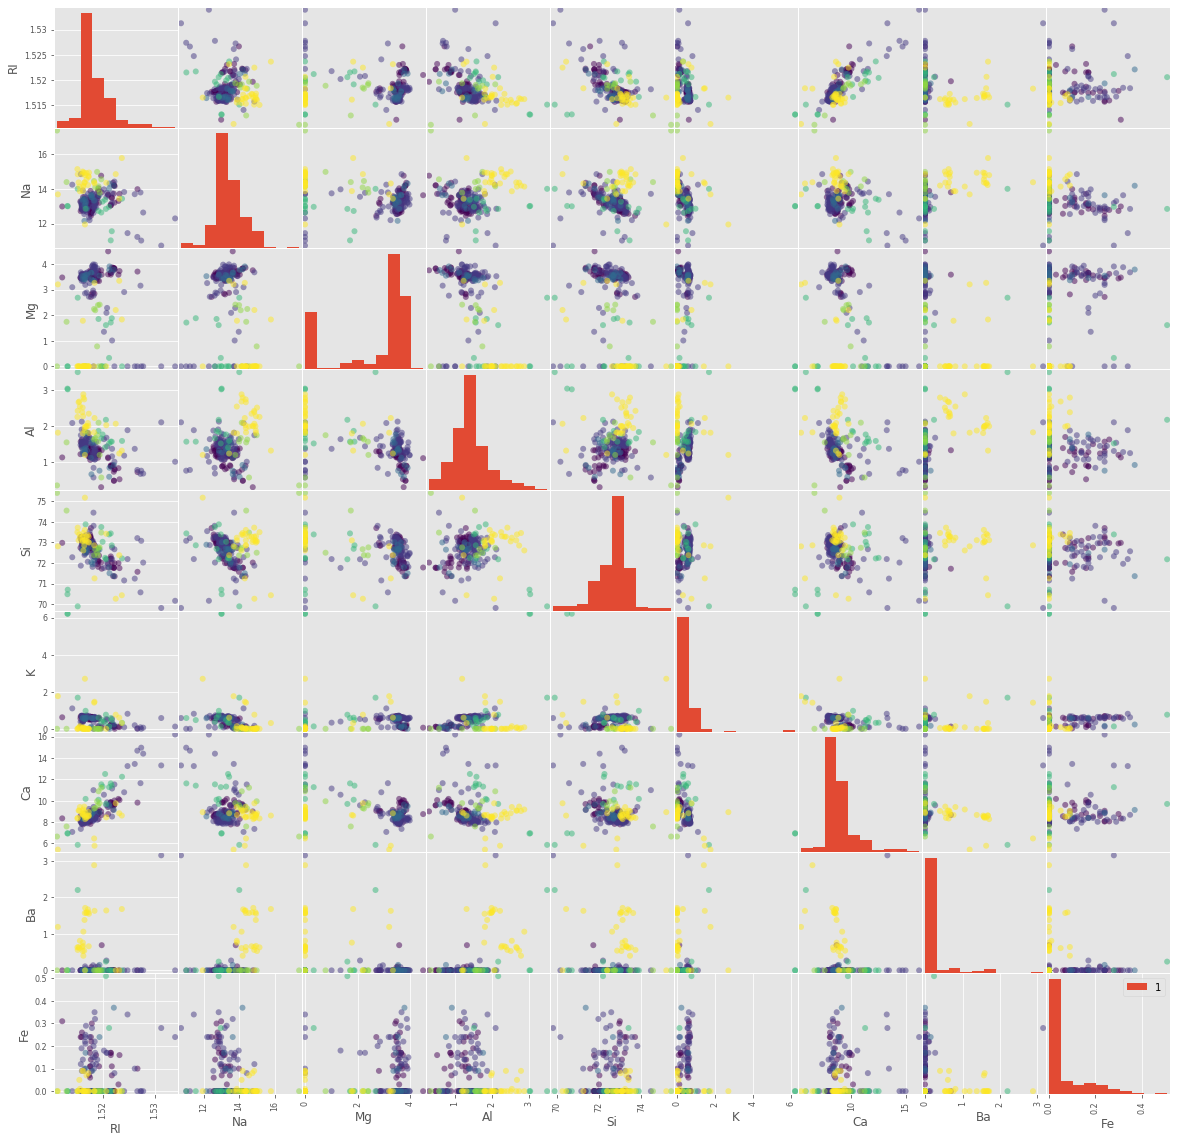

In [13]:
pd.plotting.scatter_matrix(glass.iloc[:,:-1], c=glass.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(glass["Type"].unique())
plt.show()

### Pairplot

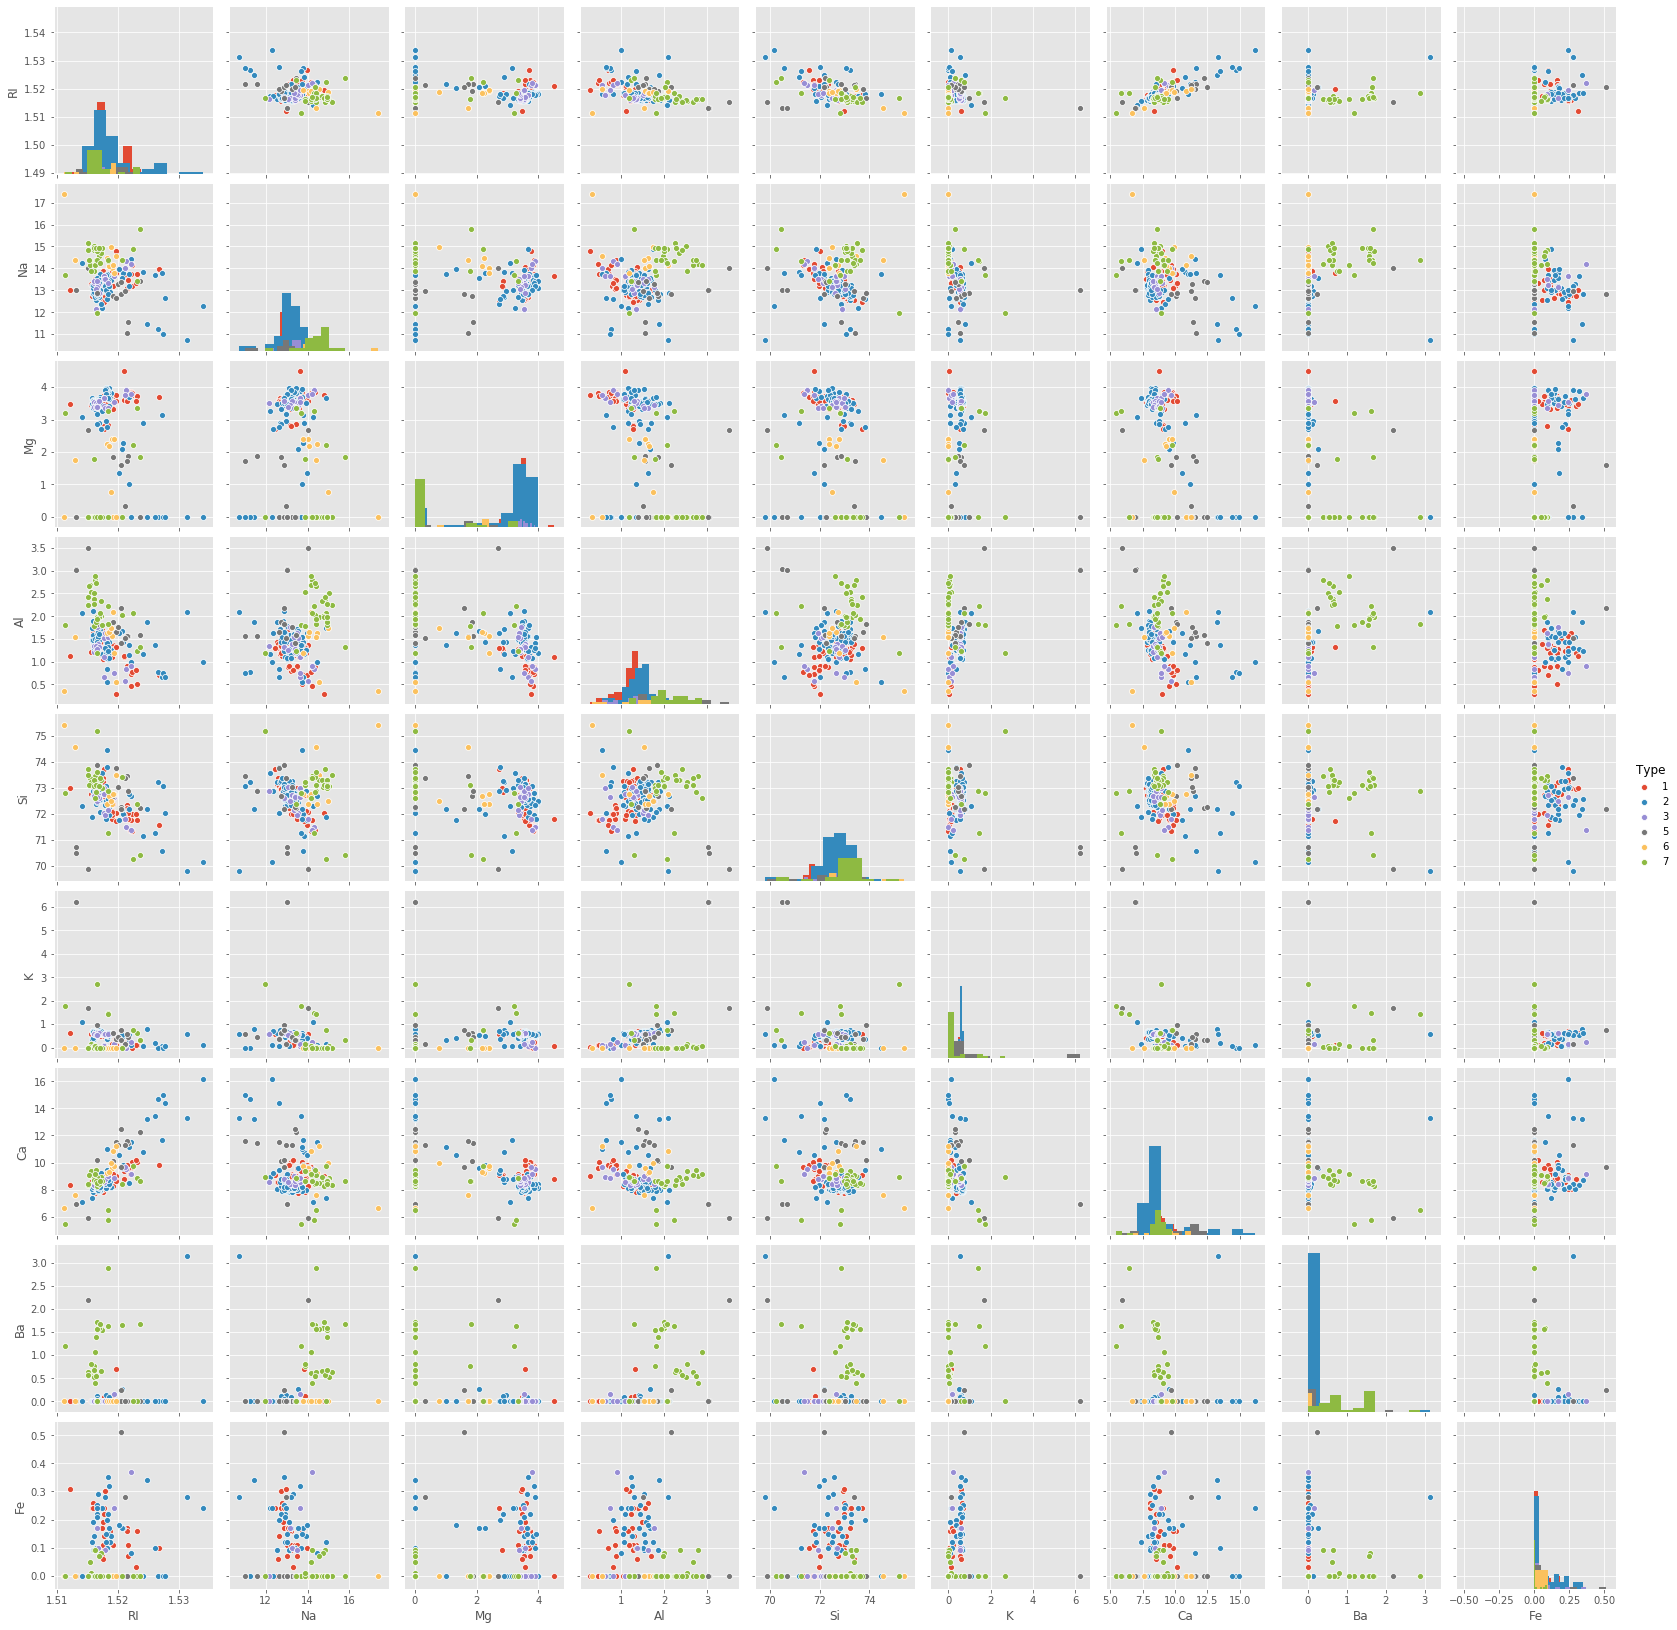

In [14]:
sns.pairplot(glass, hue='Type', diag_kind='hist')
plt.show()

### Correlation Plot

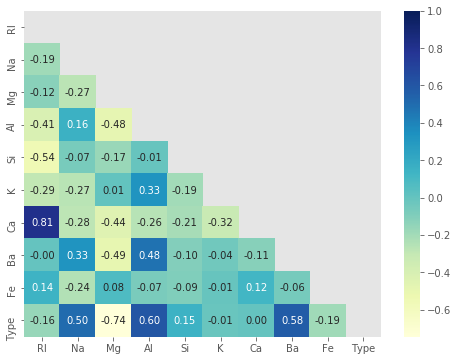

In [15]:
plt.figure(figsize=(8,6))
corr = glass.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

    K and Ca have no correlation with Type, which means for some type it maybe high for some low causing cancelling effect

### Feature Engineering - Based on the mean of K and Ca in classes

In [16]:
glass.groupby("Type")["Ca"].mean()

Type
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

In [17]:
glass.groupby("Type")["K"].mean()

Type
1    0.447429
2    0.521053
3    0.406471
5    1.470000
6    0.000000
7    0.325172
Name: K, dtype: float64

In [18]:
glass["Ca_morethan9"] = np.where(glass["Ca"]>9, 1, 0)
glass["K_morethandot7"] = np.where(glass["K"]>0.7, 1, 0)
glass["K_lessthandot4"] = np.where(glass["K"]<0.4, 1, 0)

In [19]:
cols.append("Ca_morethan9")
cols.append("K_morethandot7")
cols.append("K_lessthandot4")

    can also check the class distribution of K and Ca using visualization for better cutoffs

### Statistical Importance Check for Variable

In [20]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    data = sm.formula.ols(col+"~ Type", data=glass).fit()
    pval = sms.anova.anova_lm(data)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for RI: 0.016178455806215887
Pval for Na: 4.061873356960312e-15
Pval for Mg: 3.882994616348078e-39
Pval for Al: 3.2608094694642623e-22
Pval for Si: 0.02661991010459147
Pval for K: 0.8837426923094087
Pval for Ca: 0.9889510387030452
Pval for Ba: 3.038430172779555e-20
Pval for Fe: 0.005729300351381875
Pval for Ca_morethan9: 0.07403949750207575
Pval for K_morethandot7: 0.00010657536300297989
Pval for K_lessthandot4: 2.377474211882267e-09


#### K and Ca are not siginificant, but the new variables we have created are significant. KUDOS!!!

### Data Preprocessing & Evaluation Functions

In [21]:
seed = 1

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,\
                            BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

In [22]:
def split_data(X, Y, seed=1, train_size=0.7):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=train_size, random_state = seed, stratify=Y)
    xtrain, xtest = preprocess(xtrain, xtest)
    return (xtrain, xtest, ytrain, ytest)

def preprocess(x1, x2=None):
    sc = StandardScaler()
    x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
    if x2 is not None:
        x2 = pd.DataFrame(sc.transform(x2), columns=x2.columns)
        return (x1,x2)
    return x1

def eval_model(model, X, Y, seed=1):
    xtrain, xtest, ytrain, ytest = split_data(X, Y)
    model.fit(xtrain, ytrain)
    
    trainpred = model.predict(xtrain)
    trainpred_prob = model.predict_proba(xtrain)
    testpred = model.predict(xtest)
    testpred_prob = model.predict_proba(xtest)
    
    print("Train ROC AUC : %.4f"%roc_auc_score(ytrain, trainpred_prob, multi_class='ovr'))
    print("\nTrain classification report\n",classification_report(ytrain, trainpred))
    
    ### make a bar chart for displaying the wrong classification of one class coming in which other class
    
    print("\nTest ROC AUC : %.4f"%roc_auc_score(ytest, testpred_prob, multi_class='ovr'))
    print("\nTest classification report\n",classification_report(ytest, testpred))
    
def plot_importance(columns, importance):
    plt.bar(columns, importance)
    plt.show()

### Separating the X and Y data

In [23]:
X = glass.drop(["Type"], axis=1)
X_sc = preprocess(X)
Y = glass["Type"]

### Creating array of models

In [24]:
model_logr = LogisticRegression(random_state=seed,n_jobs=-1)
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(random_state=seed)
model_dt_bag = BaggingClassifier(model_dt, random_state=seed, n_jobs=-1)
model_ada = AdaBoostClassifier(random_state=seed)
model_gbc = GradientBoostingClassifier(random_state=seed)
model_rf = RandomForestClassifier(random_state=seed, n_jobs=-1)
model_xgb = XGBClassifier(random_state=seed)
model_lgbm = LGBMClassifier(random_state=seed, n_jobs=-1)
model_knn = KNeighborsClassifier(n_jobs=-1)

In [25]:
models = []
models.append(('LR',model_logr))
models.append(('NB',model_nb))
models.append(('DT',model_dt))
models.append(('Bag',model_dt_bag))
models.append(('Ada',model_ada))
models.append(('GBC',model_gbc))
models.append(('RF',model_rf))
models.append(('XGB',model_xgb))
models.append(('LGBM',model_lgbm))
models.append(('KNN',model_knn))

### Running the algorithms

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [27]:
results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X, Y, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
    accuracy = scores.mean()
    std = scores.std()
    print(f"{name} : Mean ROC {accuracy} STD:({std})")
    results.append(scores)
    names.append(name)

LR : Mean ROC 0.8573066250234271 STD:(0.05992448616708541)
NB : Mean ROC 0.8003772354620073 STD:(0.07612440095164127)
DT : Mean ROC 0.8005476204445927 STD:(0.05419782967953479)
Bag : Mean ROC 0.8906114151017832 STD:(0.06273921224511886)
Ada : Mean ROC 0.7545678251438894 STD:(0.04831163431214254)
GBC : Mean ROC 0.9079865572917791 STD:(0.044713468680606064)
RF : Mean ROC 0.9588519932734425 STD:(0.013626585207444423)
XGB : Mean ROC 0.9418797111292305 STD:(0.01952234791029799)
LGBM : Mean ROC 0.9355691988011564 STD:(0.02439085749626626)
KNN : Mean ROC 0.8779041345034759 STD:(0.0376380768114151)


### Comparison of Models

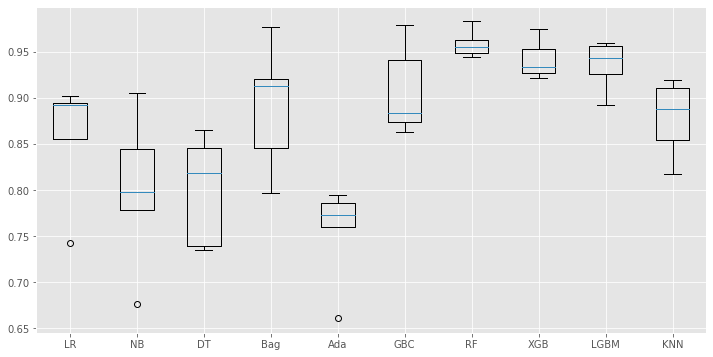

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Only Significant Variables

In [29]:
X = glass.drop(["Type","K","Ca"], axis=1)
X_sc = preprocess(X)
Y = glass["Type"]

In [30]:
results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X, Y, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
    accuracy = scores.mean()
    std = scores.std()
    print(f"{name} : Mean ROC {accuracy} STD:({std})")
    results.append(scores)
    names.append(name)

LR : Mean ROC 0.849358972469396 STD:(0.04389422162712764)
NB : Mean ROC 0.7575701061348765 STD:(0.0828471503084957)
DT : Mean ROC 0.8056141329771132 STD:(0.06152053878920532)
Bag : Mean ROC 0.8968268267655173 STD:(0.06790768152476033)
Ada : Mean ROC 0.774404721472669 STD:(0.05971987314094756)
GBC : Mean ROC 0.9120833068247196 STD:(0.046249538595433695)
RF : Mean ROC 0.9564483600199469 STD:(0.019237090120465473)
XGB : Mean ROC 0.9353359873600805 STD:(0.026671847570859823)
LGBM : Mean ROC 0.9327228426211832 STD:(0.024073796361035172)
KNN : Mean ROC 0.857661277020157 STD:(0.055693405934215616)


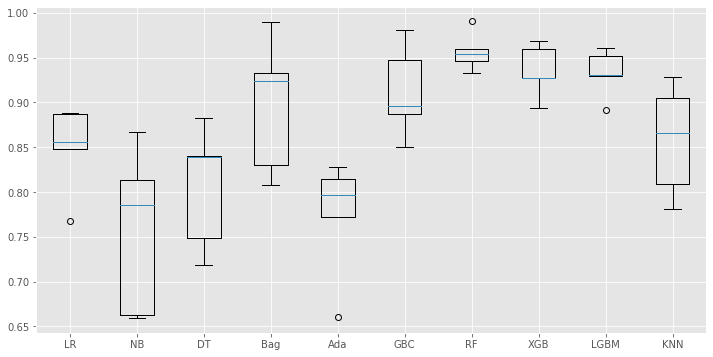

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Random Forest Model has best performance, so we can work further on it and tune to improve performance